# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [9]:
"""
Who: financial institution like banks, credit unions, lending companies, or regulatory 
bodies that oversee financial lending instiutions

What: Comprehenisve Risk Assesment: Can use machine learning to predict multiple 
types of financial risk (loan defaults, credit approvals, fraud detection)

How: comparative analysis and predictive modeling 


"""

'\nWho: financial institution like banks, credit unions, lending companies, or regulatory \nbodies that oversee financial lending instiutions\n\nWhat: Comprehenisve Risk Assesment: Can use machine learning to predict multiple \ntypes of financial risk (loan defaults, credit approvals, fraud detection)\n\nHow: comparative analysis and predictive modeling \n\n\n'

# 3. Homework - work with your own data

In [10]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

### Dataset Import Cell:

In [11]:
credit_card_approval = pd.read_csv('Application_Data.csv')
loan_default_protection = pd.read_csv("Data_Train.csv")
credit_card_fraud_train = pd.read_csv("fraudTrain.csv")
credit_card_fraud_test = pd.read_csv("fraudTest.csv")


### Summary:

In [12]:
credit_card_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

In [13]:
loan_default_protection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly_Income        81925 non-null  float64
 6   Home_Status          87500 non-null  object 
 7   Unpaid_2_years       87500 non-null  int64  
 8   Already_Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt_to_Income       84011 non-null  float64
 11  Postal_Code          86111 non-null  float64
 12  Lend_Amount          87500 non-null  float64
 13  Deprecatory_Records  87500 non-null  int64  
 14  Interest_Charged     87500 non-null  float64
 15  Usage_Rate           87500 non-null 

In [14]:
credit_card_fraud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

### Duplicate Rows Check:

In [15]:
has_duplicates_cca = credit_card_approval.duplicated().any()
print(f'Credit Card Approval datset: {has_duplicates_cca}')

has_duplicates_ldp = loan_default_protection.duplicated().any()
print(f'Loan Default Protection datset: {has_duplicates_ldp}')

has_duplicates_ccf_train = credit_card_fraud_train.duplicated().any()
print(f'Credit Card Fraud Training datset: {has_duplicates_ccf_train}')

has_duplicates_ccf_test = credit_card_fraud_test.duplicated().any()
print(f'Credit Card Fraud Test datset: {has_duplicates_ccf_test}')


'''
No duplicates in any of the datasets
'''

Credit Card Approval datset: False
Loan Default Protection datset: False
Credit Card Fraud Training datset: False
Credit Card Fraud Test datset: False


'\nNo duplicates in any of the datasets\n'

### Duplicate Values in Given Column Check:

In [16]:
duplicates_cca= {}
for column in credit_card_approval.columns:
    
    duplicates_cca[column] = credit_card_approval[column].duplicated().any() 

duplicates_ldp = {}
for column in loan_default_protection.columns:
    
    duplicates_ldp[column] = loan_default_protection[column].duplicated().any() 

duplicates_ccf_train = {}
for column in credit_card_fraud_train.columns:
    
    duplicates_ccf_train[column] = credit_card_fraud_train[column].duplicated().any() 

duplicates_ccf_test = {} 
for column in credit_card_fraud_test.columns:
    
    duplicates_ccf_test[column] = credit_card_fraud_test[column].duplicated().any() 



In [17]:
duplicates_cca, duplicates_ldp, duplicates_ccf_train, duplicates_ccf_test

({'Applicant_ID': np.False_,
  'Applicant_Gender': np.True_,
  'Owned_Car': np.True_,
  'Owned_Realty': np.True_,
  'Total_Children': np.True_,
  'Total_Income': np.True_,
  'Income_Type': np.True_,
  'Education_Type': np.True_,
  'Family_Status': np.True_,
  'Housing_Type': np.True_,
  'Owned_Mobile_Phone': np.True_,
  'Owned_Work_Phone': np.True_,
  'Owned_Phone': np.True_,
  'Owned_Email': np.True_,
  'Job_Title': np.True_,
  'Total_Family_Members': np.True_,
  'Applicant_Age': np.True_,
  'Years_of_Working': np.True_,
  'Total_Bad_Debt': np.True_,
  'Total_Good_Debt': np.True_,
  'Status': np.True_},
 {'ID': np.False_,
  'Asst_Reg': np.True_,
  'GGGrade': np.True_,
  'Experience': np.True_,
  'Validation': np.True_,
  'Yearly_Income': np.True_,
  'Home_Status': np.True_,
  'Unpaid_2_years': np.True_,
  'Already_Defaulted': np.True_,
  'Designation': np.True_,
  'Debt_to_Income': np.True_,
  'Postal_Code': np.True_,
  'Lend_Amount': np.True_,
  'Deprecatory_Records': np.True_,
  'In

### Mean, Median, Mode of Columns:

In [18]:
def mean_median_mode(dataframe): 
    metrics = {} 
    numeric_columns = dataframe.select_dtypes(include=['number', 'bool']).columns
    for column in numeric_columns:
        metrics[column] = f'Mean: {dataframe[column].mean()}, Median: {dataframe[column].astype(float).median()}, Mode: {dataframe[column].mode()[0]}'
    return metrics

##### Credit Card Approval

In [19]:
mean_median_mode(credit_card_approval)


{'Applicant_ID': 'Mean: 5078835.482290672, Median: 5079004.0, Mode: 5008806',
 'Owned_Car': 'Mean: 0.4183779051257561, Median: 0.0, Mode: 0',
 'Owned_Realty': 'Mean: 0.6549267749124482, Median: 1.0, Mode: 1',
 'Total_Children': 'Mean: 0.509471505889844, Median: 0.0, Mode: 0',
 'Total_Income': 'Mean: 194836.49856733525, Median: 180000.0, Mode: 135000',
 'Owned_Mobile_Phone': 'Mean: 1.0, Median: 1.0, Mode: 1',
 'Owned_Work_Phone': 'Mean: 0.2737583572110793, Median: 0.0, Mode: 0',
 'Owned_Phone': 'Mean: 0.2927411652340019, Median: 0.0, Mode: 0',
 'Owned_Email': 'Mean: 0.10068449538363579, Median: 0.0, Mode: 0',
 'Total_Family_Members': 'Mean: 2.291308500477555, Median: 2.0, Mode: 2',
 'Applicant_Age': 'Mean: 40.995503024514484, Median: 40.0, Mode: 38',
 'Years_of_Working': 'Mean: 7.690902578796561, Median: 6.0, Mode: 2',
 'Total_Bad_Debt': 'Mean: 0.3330945558739255, Median: 0.0, Mode: 0',
 'Total_Good_Debt': 'Mean: 21.05754536771729, Median: 18.0, Mode: 7',
 'Status': 'Mean: 0.99518465456

#### Loan Default Protection

In [20]:
mean_median_mode(loan_default_protection)

{'ID': 'Mean: 83946.25350857143, Median: 83900.0, Mode: 21560',
 'Asst_Reg': 'Mean: 3798914.1241485714, Median: 4132010.5, Mode: 184784',
 'Yearly_Income': 'Mean: 134859.62977978395, Median: 114400.0, Mode: 105600.0',
 'Unpaid_2_years': 'Mean: 0.3329371428571429, Median: 0.0, Mode: 0',
 'Already_Defaulted': 'Mean: 0.005725714285714285, Median: 0.0, Mode: 0',
 'Debt_to_Income': 'Mean: 30.94266038494959, Median: 30.1392, Mode: 22.9824',
 'Postal_Code': 'Mean: 51155.38549081999, Median: 47700.0, Mode: 75000.0',
 'Lend_Amount': 'Mean: 25920.53568, Median: 23940.0, Mode: 17100.0',
 'Deprecatory_Records': 'Mean: 0.2024, Median: 0.0, Mode: 0',
 'Interest_Charged': 'Mean: 16.51837474285714, Median: 16.49, Mode: 14.56',
 'Usage_Rate': 'Mean: 95.51734774857142, Median: 97.008, Mode: 0.0',
 'Inquiries': 'Mean: 0.67064, Median: 0.0, Mode: 0',
 'Present_Balance': 'Mean: 236389.46478285713, Median: 138806.225, Mode: 0.0',
 'Gross_Collection': 'Mean: 39.46169702857143, Median: 0.0, Mode: 0.0',
 'Sub_

#### Credit Card Fraud, Training Data

In [21]:
mean_median_mode(credit_card_fraud_train)

{'Unnamed: 0': 'Mean: 648337.0, Median: 648337.0, Mode: 0',
 'cc_num': 'Mean: 4.1719204207972666e+17, Median: 3521417320836166.0, Mode: 571365235126',
 'amt': 'Mean: 70.35103545607033, Median: 47.52, Mode: 1.14',
 'zip': 'Mean: 48800.67109722945, Median: 48174.0, Mode: 73754',
 'lat': 'Mean: 38.53762161489965, Median: 39.3543, Mode: 36.385',
 'long': 'Mean: -90.22633537864147, Median: -87.4769, Mode: -98.0727',
 'city_pop': 'Mean: 88824.44056297839, Median: 2456.0, Mode: 606',
 'unix_time': 'Mean: 1349243636.7261226, Median: 1349249747.0, Mode: 1335110521',
 'merch_lat': 'Mean: 38.53733804469971, Median: 39.36568, Mode: 32.644690000000004',
 'merch_long': 'Mean: -90.22646479897277, Median: -87.43839200000001, Mode: -87.116414',
 'is_fraud': 'Mean: 0.005788651743883394, Median: 0.0, Mode: 0'}

#### Credit Card Fraud, Test Data

In [22]:
mean_median_mode(credit_card_fraud_test)

{'Unnamed: 0': 'Mean: 277859.0, Median: 277859.0, Mode: 0',
 'cc_num': 'Mean: 4.178386955287641e+17, Median: 3521417320836166.0, Mode: 6538441737335434',
 'amt': 'Mean: 69.39281023322938, Median: 47.29, Mode: 1.1',
 'zip': 'Mean: 48842.62801523792, Median: 48174.0, Mode: 82514',
 'lat': 'Mean: 38.54325282129998, Median: 39.3716, Mode: 43.0048',
 'long': 'Mean: -90.23132507832197, Median: -87.4769, Mode: -108.8964',
 'city_pop': 'Mean: 88221.88791817447, Median: 2408.0, Mode: 606',
 'unix_time': 'Mean: 1380678865.1667802, Median: 1380761988.0, Mode: 1381001869',
 'merch_lat': 'Mean: 38.54279777803892, Median: 39.376593, Mode: 39.779565000000005',
 'merch_long': 'Mean: -90.23138049244673, Median: -87.445204, Mode: -101.279902',
 'is_fraud': 'Mean: 0.0038598644278853163, Median: 0.0, Mode: 0'}

### Missing or Null Values

In [23]:
credit_card_approval.isnull().sum()


Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64

In [24]:
loan_default_protection.isnull().sum()
missing_cols_ldp = loan_default_protection.columns[loan_default_protection.isnull().any()].tolist()
print(missing_cols_ldp)


['Yearly_Income', 'Designation', 'Debt_to_Income', 'Postal_Code', 'Total_Unpaid_CL', 'Unpaid_Amount']


In [25]:
credit_card_fraud_train.isnull().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [26]:
credit_card_fraud_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Outliers/Inconsistent Data

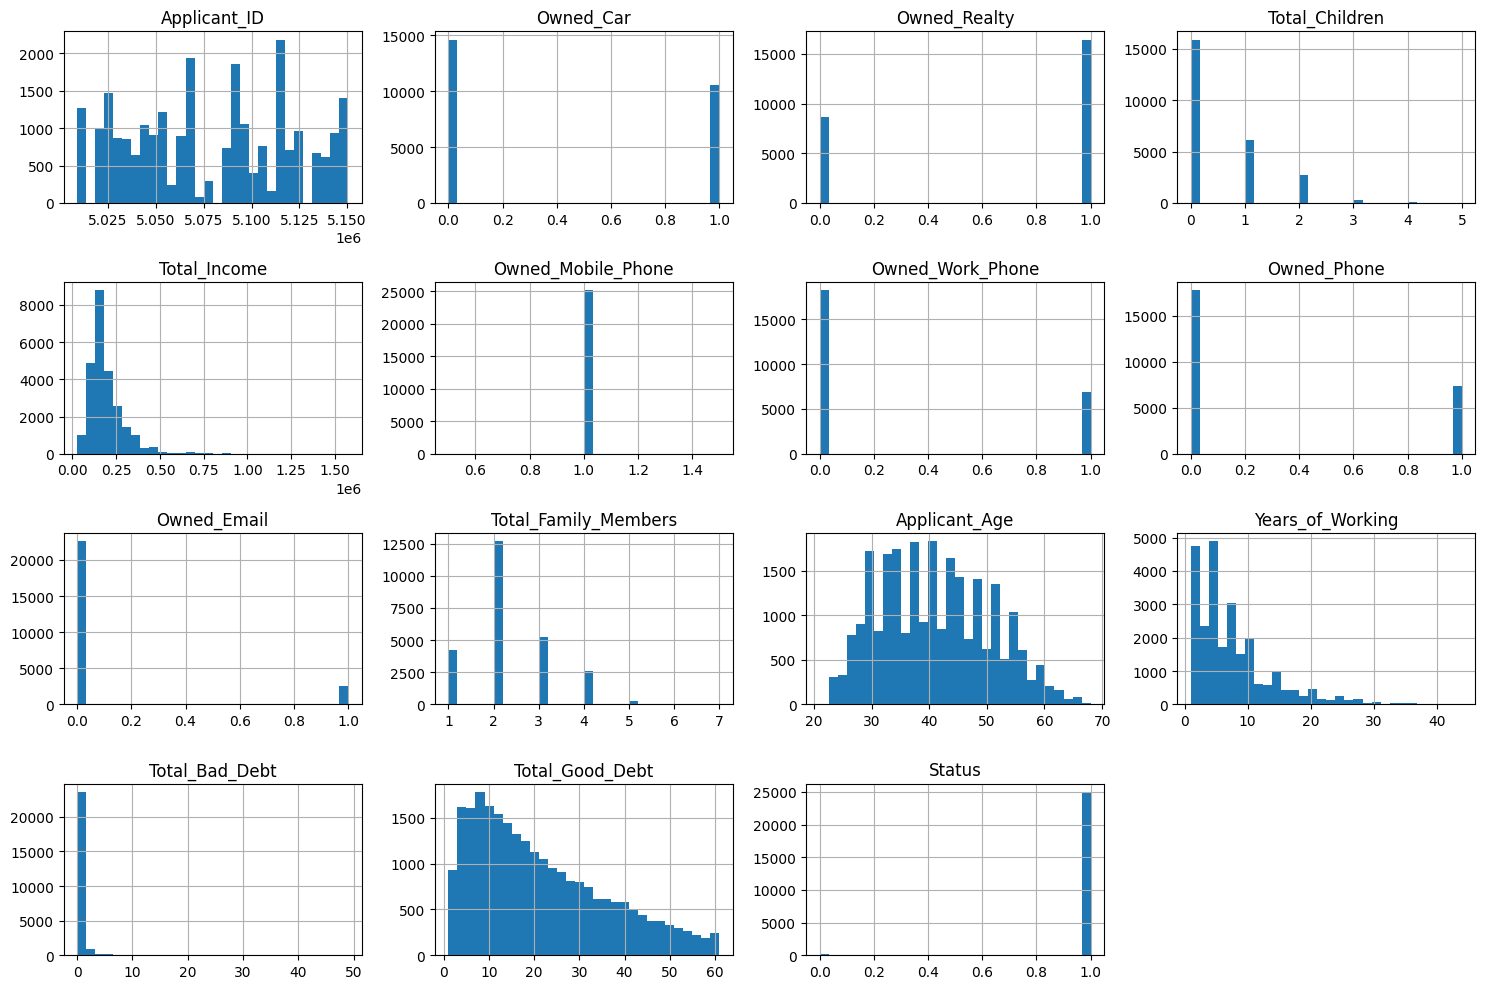

In [29]:
import matplotlib.pyplot as plt
credit_card_approval.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

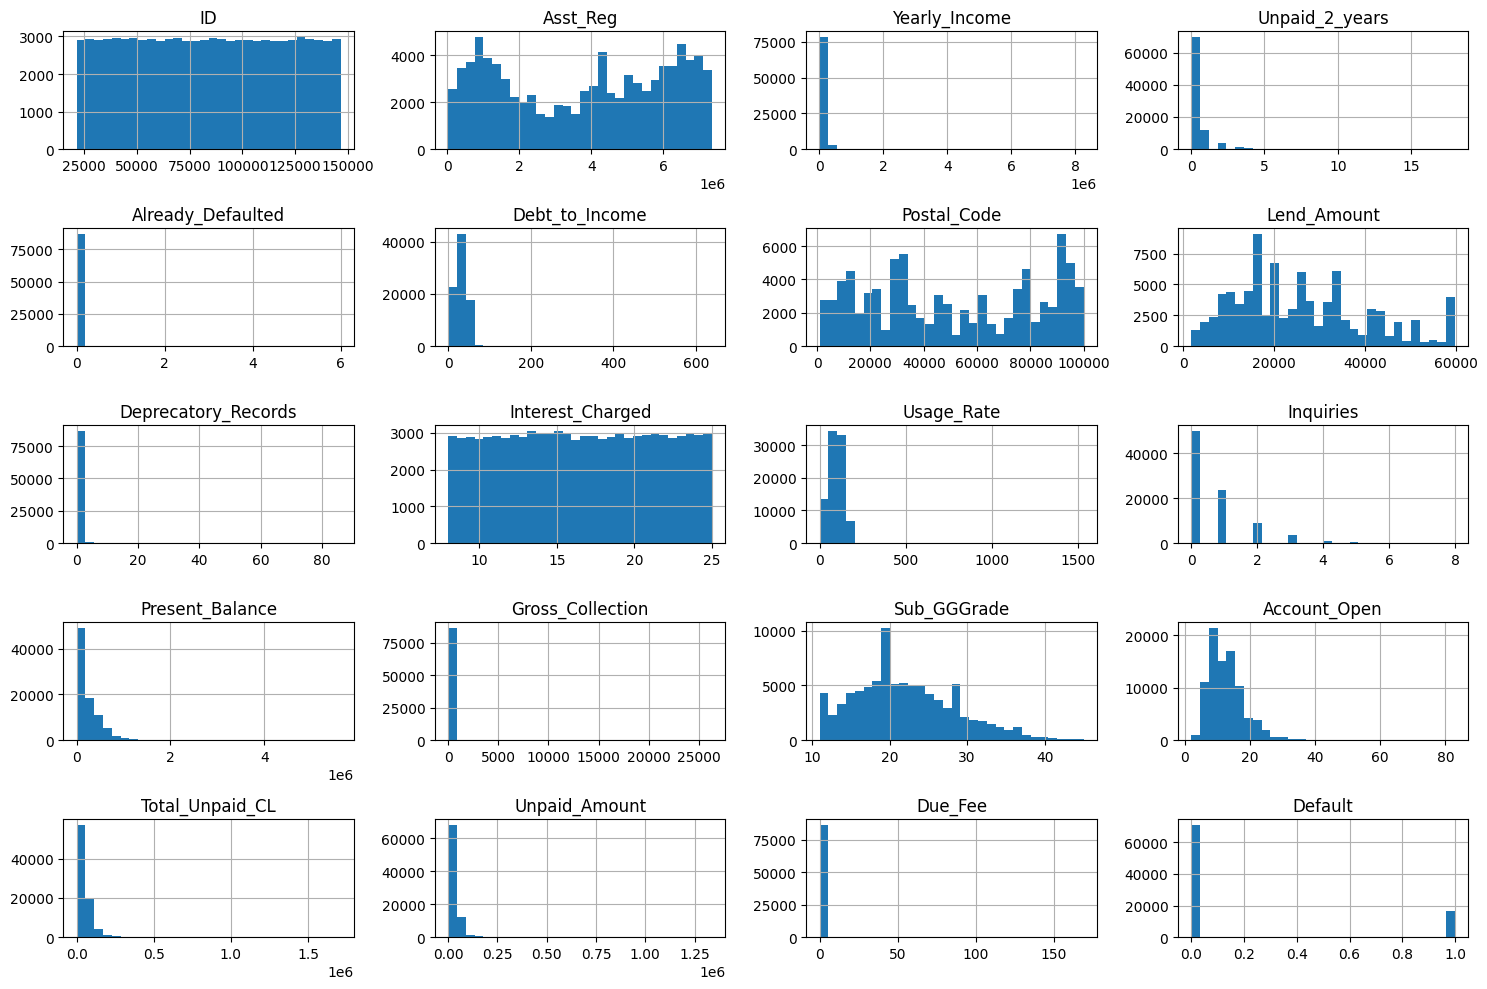

In [30]:
loan_default_protection.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

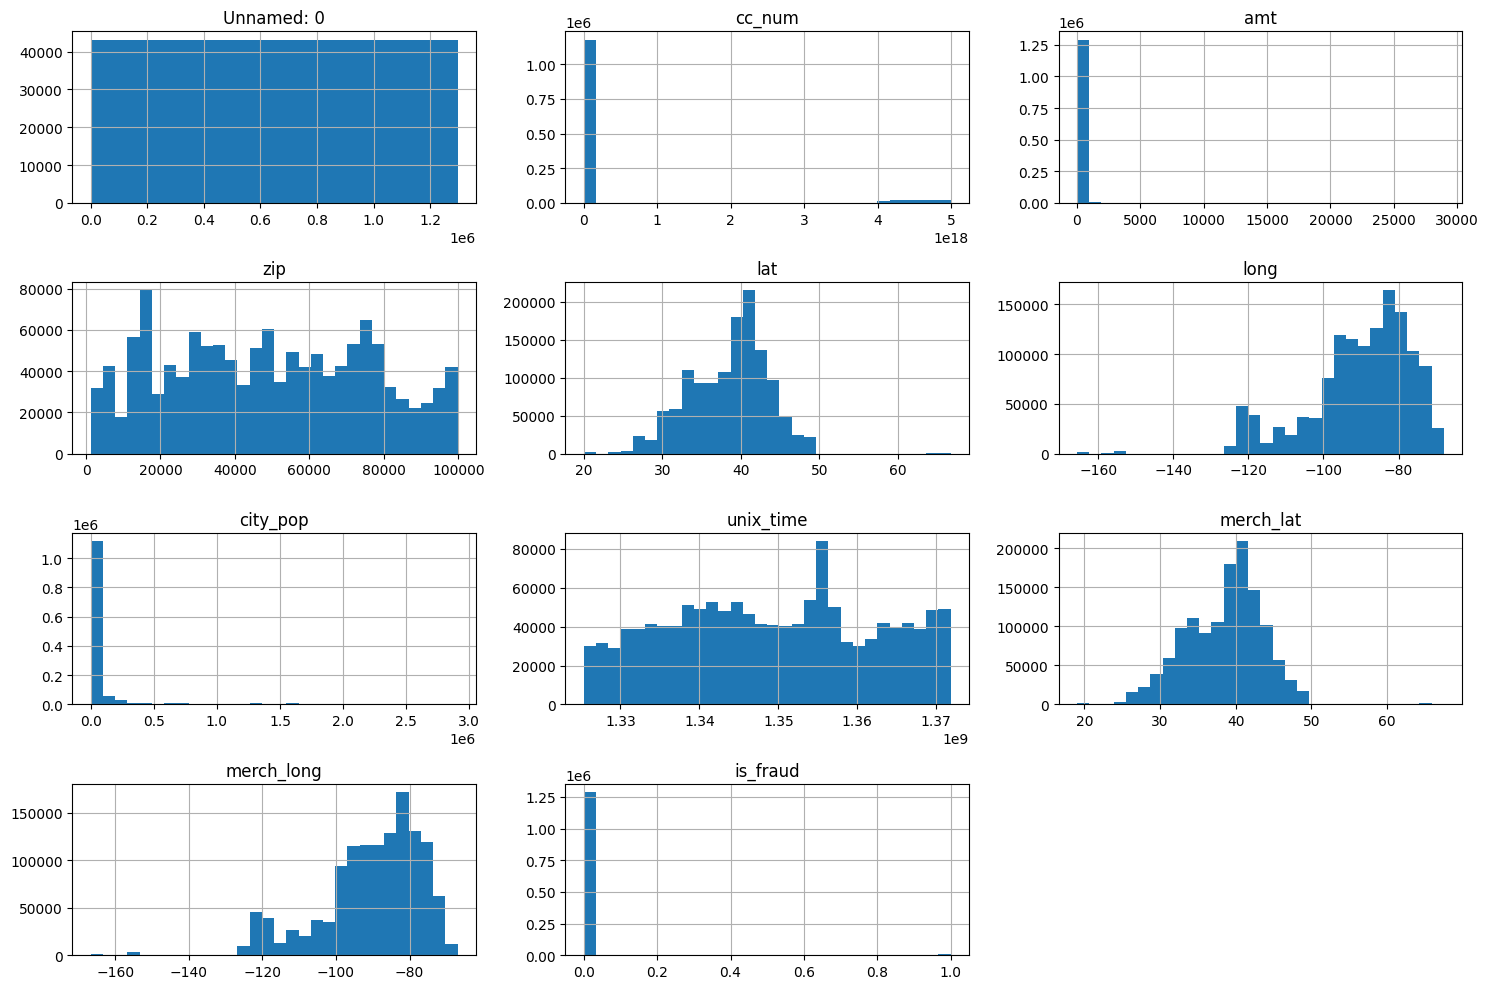

In [ ]:
credit_card_fraud_train.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

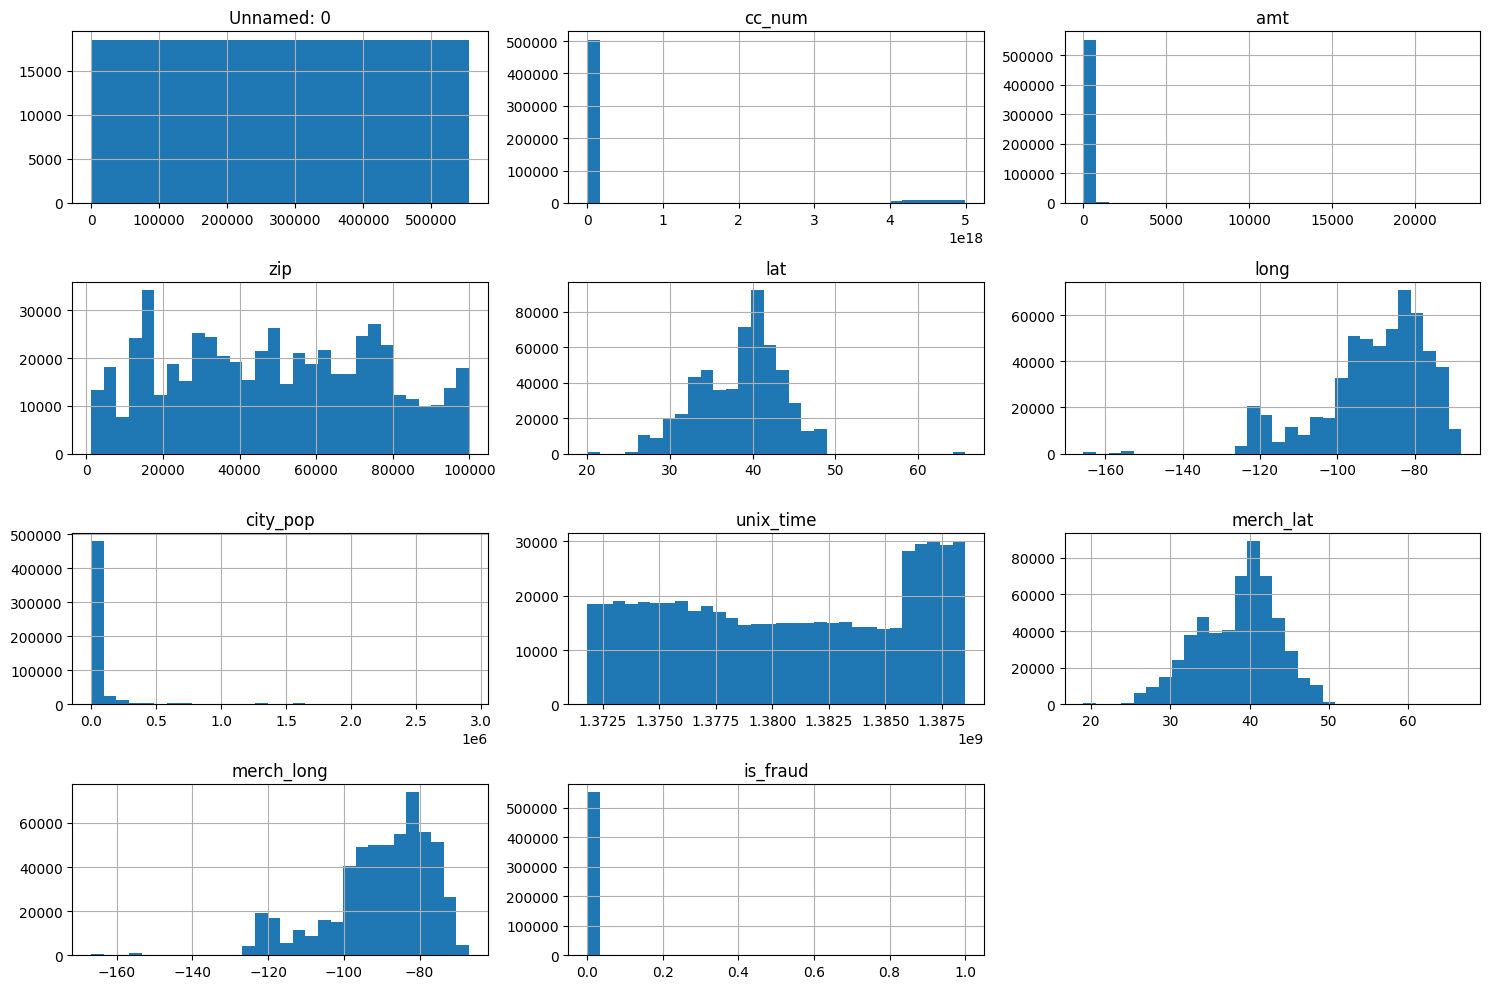

In [31]:
credit_card_fraud_test.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

A few areas of concern that will warrant some investigation: 

For Credit Card Approval Dataset: 
- Appears may be an outlier for "Total Bad Debt" column. Will have to get max values to see. 

For Loan Default Protection Dataset: 
- Appears may have outlier for "Yearly Income", "Unpaid 2 Years"
- "Already Defaulted" is supposed to be a binary yes/no (1/0), appears to have erronious value(s)
-"Deprecatory_Records", "Present_Balance", "Total_Unpaid_CL", "Unpaid_Amount" heavy right-skewed. Investigate max values benifical 

For Credit Card Fraud Training Dataset: 
- cc_num: Extremely right-skewed with massive concentration near 0 and a very long tail extending to 5×10⁶
- amt: Similar extreme right-skew with heavy concentration at 0 and tail extending to 30,000+
- city_pop: Heavily concentrated near 0 with a long right tail extending to 3×10⁶
- Unnamed: 0, Appears to be an index/ID variable with uniform distribution, but the scale (0 to 1.2×10⁶) suggests potential data issues

For Credit Card Fraud Test Dataset: 
- cc_num: Still extremely right-skewed with massive concentration near 0 and a very long tail extending to 5×10¹⁸ (this is an enormous scale suggesting potential data quality issues)
- city_pop: Extremely right-skewed with heavy concentration near 0 and tail extending to 3×10⁶
- amt: Right-skewed with concentration at low values and tail extending to ~25,000

## One Hot Encoding

Credit Card Approval dataset already has all relveant catigorical inputs one hot encoded. 

Loan Default Protection Dataset has on applicable column: Home_Status. This column is one hot coded below

The credit card fraud datasets are already one hot encoded for categorical data

In [32]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize encoder
encoder = OneHotEncoder(sparse_output=False )  # drop='first' to avoid multicollinearity

# Fit and transform
encoded_array = encoder.fit_transform(loan_default_protection[['Home_Status']])

# Convert back to DataFrame
feature_names = encoder.get_feature_names_out(['Home_Status'])
loan_default_protection_encoded = pd.DataFrame(encoded_array, columns=feature_names, index=loan_default_protection.index)

# Concatenate with original dataframe
loan_default_protection_final = pd.concat([loan_default_protection.drop('Home_Status', axis=1), loan_default_protection_encoded], axis=1)
loan_default_protection_final.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Unpaid_2_years,Already_Defaulted,Designation,Debt_to_Income,...,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default,Home_Status_MORTGAGE,Home_Status_NONE,Home_Status_OTHER,Home_Status_OWN,Home_Status_RENT
0,95074,421802,II,>10yrs,Vfied,633600.00,0,0,GLENDALE NISSAN,12.5496,...,31216.05,debt consolidation,I,0.0,0,1.0,0.0,0.0,0.0,0.0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,0,0,Business Teacher,9.0048,...,11660.49,debt consolidation,I,0.0,0,0.0,0.0,0.0,0.0,1.0
2,92602,4247560,III,<1yr,Source Verified,79200.00,0,0,driver,24.9144,...,5637.87,major purchase,I,0.0,0,0.0,0.0,0.0,0.0,1.0
3,22591,197179,III,<1yr,Vfied,61600.00,0,0,AvePoint,16.5816,...,15607.17,major purchase,I,0.0,1,0.0,0.0,0.0,0.0,1.0
4,125060,4646684,V,2yrs,Source Verified,68053.92,0,0,Lead Tester,40.0512,...,27472.86,debt consolidation,I,0.0,0,0.0,0.0,0.0,0.0,1.0


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

Text(0.5, 1.0, 'Before')

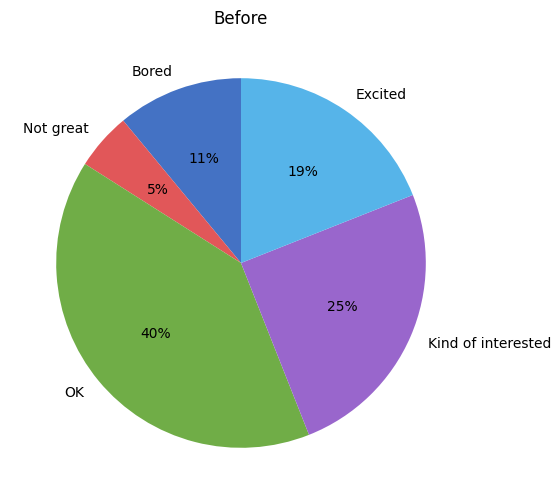

In [33]:

import matplotlib.pyplot as plt

labels = ['Bored', 'Not great', 'OK', 'Kind of interested', 'Excited']
colors = ['#4472C4', '#E15759', '#70AD47', '#9966CC', '#56B4E9']


sizes1 = [11, 5, 40, 25, 19]

# Create subplots
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

# First pie chart
ax1.pie(sizes1, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)
ax1.set_title('Before')